<a href="https://colab.research.google.com/github/JuanPedroDelCastillo/FisicaComputacional1/blob/master/Evaluaci%C3%B3n3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Evaluación 3**

## **Problema 1**

Resuelve numéricamente la ecuación de reacción-difusión para el caso de condiciones de frontera tipo Dirichlet por el método de BTCS, con condición inicial $u(x,0)=0$, y condiciones a la frontera $u(0,t)=1$ y $u(1,t)=2$, para un tiempo $t=0,..,1$.

Muestra una gráfica de la evolución temporal de la reacción difusión de los compuestos.

True


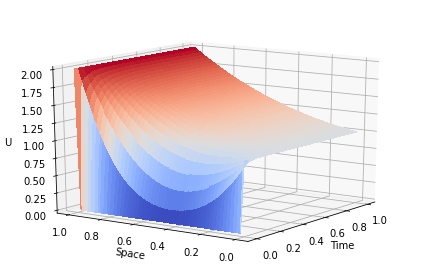

In [30]:
'''
Backward method to solve 1D reaction-diffusion equation:
    u_t = D * u_xx + alpha * u
    
with Dirichlet boundary conditions u(x0,t) = 0, u(xL,t) = 0
and initial condition u(x,0) = 4*x - 4*x**2
'''

# Importamos Bibliotecas
import numpy as np
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

# Para el método de diferencias finitas es necesario
# declarar el tamaño de la malla, es decir, el número
# de puntos discretos para el eje del tiempo y espacio.

M = 50 # GRID POINTS on space interval
N = 60 # GRID POINTS on time interval

# El tupo empieza en x=0 y termina en x=1
x0 = 0
xL = 1

# La distancia entre los puntos en x
# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

# El tiempo empieza en 0 y va a 1
t0 = 0
tF = 1

# La distancia entre los puntos en t
# ----- Time step -----
dt = (tF - t0)/(N - 1)

# El coeficiente de difusión para este problema es D=1
# Mientras que el ratio de reacción es alpha = -1
# Esto es porque por cada tres moléculas (2 H2 + 1 O2)
# se crean dos moléculas de agua (2 H2O)
D = 1  # Diffusion coefficient
alpha = -1 # Reaction rate

r = dt*D/dx**2
s = dt*alpha;

xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Initializes matrix U -----
U = np.zeros((M, N))

# La condición inicial es que el tubo este vacío (u(x, 0)=0)
#----- Initial condition -----
U[:,0] = np.zeros(xspan.shape)


# Las condiciones de frontera son, en una frontera siempre hay
# una molécula de oxígeno de concentración (1 O2) mientras que en la otra siempre 
# hay una concentración de dos moléculas de hidrógeno (2 H2)
#----- Dirichlet boundary conditions -----
U[0,:] = 1.0
U[-1,:] = 2.0

# Se resuelve a partir de métodos numéricos la ecuación 

for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2  # Right hand side
    U[1:M-1, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.coolwarm, antialiased=False)

ax.view_init(15, 215)
ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
plt.tight_layout()
plt.show()

En esta gráfica podemos observar como al inicio el tubo se encontraba vacío, a partir del tiempo vemos como la concentración tiende aun punto de equilibrio que parece ser una recta al final, donde la concentración va desde 1 hasta 2. A partir del tiempo 0.2 ya se observa un estado de equilibrio aproximado.

Después de un segundo podemos pensar que la gráfica no cambiará significativamente con el tiempo. De este modo, podemos analizar el estado de equilibrio al que llegó el tubo. Por las condiciones de frontera, las fronteras permanecen constante, sin embargo, a diferencia de una difusión normal, aquí no observamos una recta sino una curva que parece tender a una recta. 

## **Problema 2**

Ahora supondremos que se colocan reguladores de presión, que permiten flujo de los gases desde los reservorios hacia el tubo inicialmente vacío $u(x,0) = 0$. En $x=0$, el flujo de gas es $\partial u/\partial x (0,t) = 0.1$  y en $x=1$ el flujo $\partial u/\partial x (1,t) = 0.2$.

Se pide realizar una simulación numérica de este escenario para $t=0,..,10$.

True


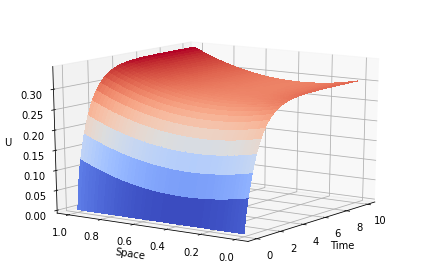

In [31]:
'''
Backward method to solve 1D reaction-diffusion equation:
    u_t = D * u_xx + alpha * u
    
with Neumann boundary conditions 
at x=0: u_x = sin(pi/2)
at x=L: u_x = sin(3*pi/4) with L=1
and initial condition u(x,0) = 4*x - 4*x**2
'''

# Importamos Bibliotecas
import numpy as np
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

# Para el método de diferencias finitas es necesario
# declarar el tamaño de la malla, es decir, el número
# de puntos discretos para el eje del tiempo y espacio.
M = 50 # GRID POINTS on space interval
N = 60 # GRID POINTS on time interval

# El tupo empieza en x=0 y termina en x=1
x0 = 0
xL = 1

# La distancia entre los puntos en x
# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

# El tiempo empieza en 0 y va a 1
t0 = 0
tF = 10

# La distancia entre los puntos en t
# ----- Time step -----
dt = (tF - t0)/(N - 1)

# El coeficiente de difusión para este problema es D=1
# Mientras que el ratio de reacción es alpha = -1
# Esto es porque por cada tres moléculas (2 H2 + 1 O2)
# se crean dos moléculas de agua (2 H2O)
D = 1  # Diffusion coefficient
alpha = -1 # Reaction rate

r = dt*D/dx**2
s = dt*alpha
a = 1 + 2*r - s


xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M))
off_diag = -r*np.ones((1, M-1))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()
A[0,1] = -2*r
A[M-1,M-2] = -2*r

# ----- Initializes matrix U -----
U = np.zeros((M, N))

# La condición inicial es que el tubo este vacío (u(x, 0)=0)
#----- Initial condition -----
U[:,0] = np.zeros(xspan.shape)

# Las condiciones de frontera son, en la frontera del oxígeno se
# emite con un flujo de 0.1, y del hidrógeno con un flujo de 0.2
# es decir, el flujo del hidrógeno es del doble que del oxígeno.
#----- Neumann boundary conditions -----
leftBC = np.arange(1, N+1)
f = np.ones(leftBC.shape)*0.1

rightBC = np.arange(1, N+1)
g = np.ones(leftBC.shape)*0.2


for k in range(1, N):
    c = np.zeros((M-2,1)).ravel()
    b1 = np.asarray([2*r*dx*f[k], 2*r*dx*g[k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[0:M, k-1])
    b = b1 + b2  # Right hand side
    U[0:M, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
gc = np.allclose(np.dot(A,U[0:M,N-1]), b)
print(gc)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.coolwarm, antialiased=False)

ax.view_init(15, 215)
ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
plt.tight_layout()
plt.show()

En esta gráfica podemos ver como al inicio el tubo se encontraba vacío, y además las fronteras también. Por las condiciones de fronteras sabemos que el flujo del hidrógeno es el doble que del oxígeno, lo cual tiene sentido sabiendo que se requieren dos moléculas de hidrógeno y una de oxígeno para formar una molécula de agua. Además, a diferencia del ejercicio anterior, vemos que ambos lados crecen de manera muy similar, pero no igual.

Un dato interesante que podemos rescatar de esta solución, es el centro del tubo, pues vemos que la distribución de la concentración disminuye en el centro y aumenta en los laterales. 


## **Problema 3**

¿Que pasaría en el caso de que se mezclaran dos gases que no reaccionan entre si, como sería mezclar dos recipientes con el  mismo tipo de gas (el coeficiente de reacción $\alpha=0$)?.

Suponga que inicialmente el tubo está vacío $u(x,0)=0$ y la concentración en $u(0,t)=1$ y $u(1,t)=2$.

Resuelva numéricamente este caso. 

True


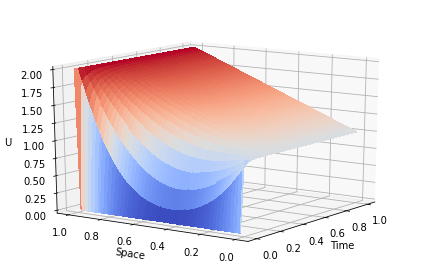

In [33]:
'''
Backward method to solve 1D reaction-diffusion equation:
    u_t = D * u_xx + alpha * u
    
with Dirichlet boundary conditions u(x0,t) = 0, u(xL,t) = 0
and initial condition u(x,0) = 4*x - 4*x**2
'''

# Importamos Bibliotecas
import numpy as np
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

# Para el método de diferencias finitas es necesario
# declarar el tamaño de la malla, es decir, el número
# de puntos discretos para el eje del tiempo y espacio.

M = 50 # GRID POINTS on space interval
N = 60 # GRID POINTS on time interval

# El tupo empieza en x=0 y termina en x=1
x0 = 0
xL = 1

# La distancia entre los puntos en x
# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

# El tiempo empieza en 0 y va a 1
t0 = 0
tF = 1

# La distancia entre los puntos en t
# ----- Time step -----
dt = (tF - t0)/(N - 1)

# El coeficiente de difusión para este problema es D=1
# Mientras que el ratio de reacción es alpha = 0
# Esto es porque en ambos lados se esta emitiendo la misma
# sustancia, y esta no reacciona con sí misma. De este modo
# el problema se reduce solamente a la difusión, como en
# la ecuación de calor.
D = 1  # Diffusion coefficient
alpha = 0 # Reaction rate

r = dt*D/dx**2
s = dt*alpha;

xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Initializes matrix U -----
U = np.zeros((M, N))

# La condición inicial es que el tubo este vacío (u(x, 0)=0)
#----- Initial condition -----
U[:,0] = np.zeros(xspan.shape)


# Las condiciones de frontera son, en una frontera siempre hay
# una concentración de una molécula en proporción de la sustancia 
# mientras que en la otra hay el doble de la concentración:
#----- Dirichlet boundary conditions -----
U[0,:] = 1.0
U[-1,:] = 2.0

for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2  # Right hand side
    U[1:M-1, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.coolwarm, antialiased=False)

ax.view_init(15, 215)
ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
plt.tight_layout()
plt.show()

Se puede observar como al inicio el tubo estaba vacío, para posteriormente aumentar la concentración formando un segmento de recta con sus fronteras. A diferencia de la primera gráfica donde teníamos dos compuestos distintos, aquí observamos que el estado de equilibrio es una recta. 

A partir de esta comparación, podemos concluir que el uso de dos compuestos distintos (es decir, la presencia de un ratio de reacción) produce una curva en la cual se nota una inclinación o un 'peso' en el centro de la distribución.